**We will now move on to the next part of the assignment, with problems of Time Series. For the first exercise, here's a bit of pre-requisite knowledge first.** 

ACF and PACF : As discussed in the notes, the ACF and PACF of a time series process are very crucial in determining the 

a) Nature of the process (AR, MA, Seasonal etc)

b) Order of the process. 

With some examples below, we'll learn how. 

The first step, however, is to plot a time series dataset of known type(AR) and order (2) and see for ourselves the ACF and PACF to confirm.



In [ ]:
#import the necessary modules 
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np

Now, we simulate an AR(2) process using the statsmodels module. This module gives us an elegant way of simulating ARMA process, but for now, we'll ignore the MA (moving average) part and focus on the AR process
for our AR(2) process, the phi values are defined using the ar1 array below : (-ve values because they appear in the LHS in literature)

In [ ]:
ar1 = np.array([1, -0.4, -0.5])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data = AR_object1.generate_sample(nsample=500)

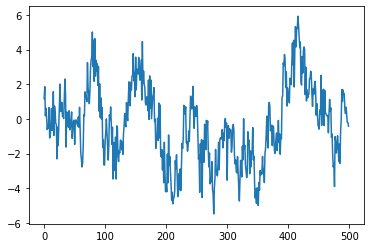

In [ ]:
#plot the simulated data using matplotlib 
import matplotlib.pyplot as plt 
plt.plot(simulated_data)

**We'll now plot the ACF and PACF to make important observations**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#plot the ACF and PACF 

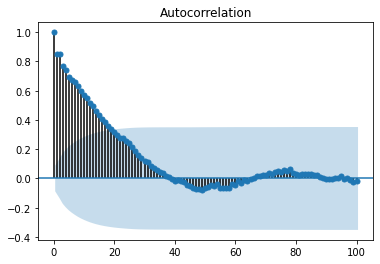

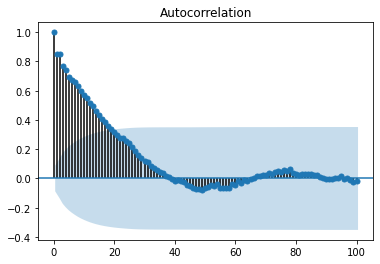

In [ ]:
plot_acf(simulated_data, lags= 100)

Note the **exponential decrease in the phi correlation values**, and recall the reason for the same from your notes (Hint : if a^x exponentially decreases with x, a must be < 1) 

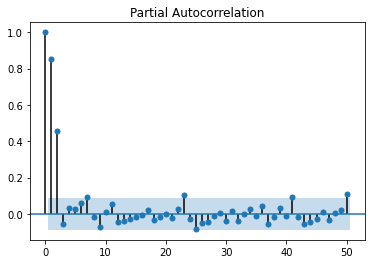

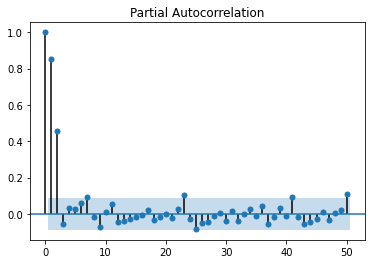

In [ ]:
plot_pacf(simulated_data, lags = 50)

Notice that the PACF values are significant for lag 1 and 2 ( for lag = 0, the PACF values is obviously 1). Thus, we arrive at an important conclusion : **a high PACF value for a given lag value for an AR process indicates the importance of that lag number in the AR process.** We will strengthen this definition with a couple of exercises 

**Exercise 1**

Generate AR processes with with order = 1 and at least 3 different phi values. Plot the ACF and PACF graphs of these processes and comment on how the graphs change with phi values 

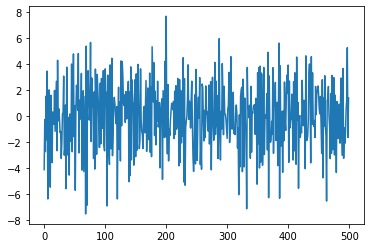

In [ ]:
ar = np.array([1, .35])
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data1 = AR_object.generate_sample(nsample=500,scale=2.5)
plt.plot(simulated_data1)

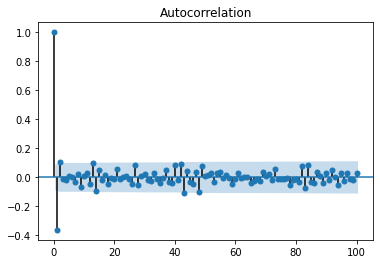

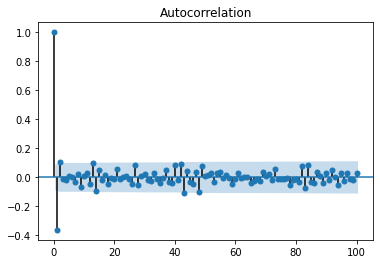

In [ ]:
plot_acf(simulated_data1, lags= 100)

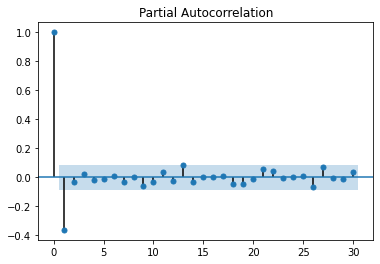

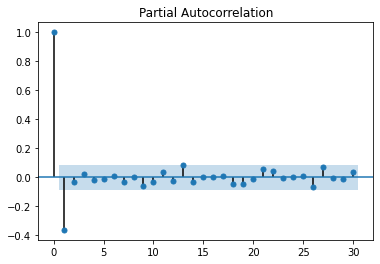

In [ ]:
plot_pacf(simulated_data1, lags = 30)

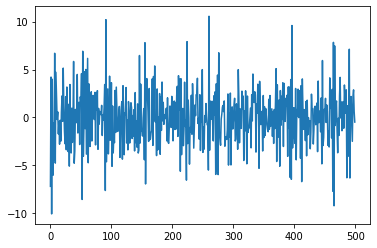

In [ ]:
ar = np.array([1, .55])
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data2 = AR_object.generate_sample(nsample=500,scale=2.5)
plt.plot(simulated_data2)

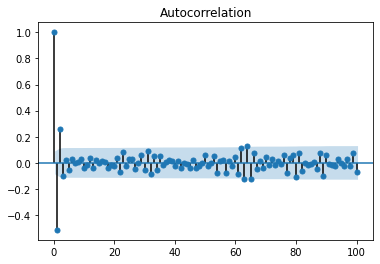

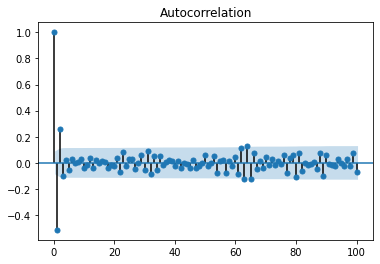

In [ ]:
plot_acf(simulated_data2, lags= 100)

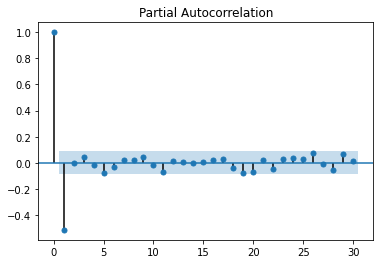

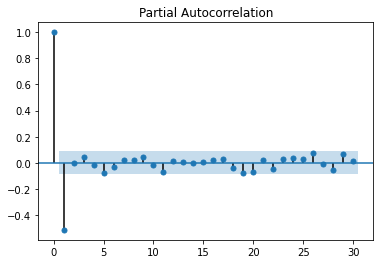

In [ ]:
plot_pacf(simulated_data2, lags = 30)

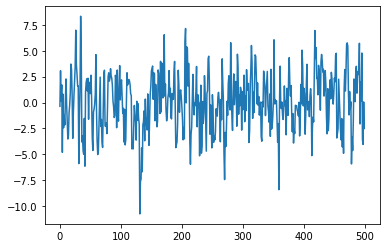

In [ ]:
ar = np.array([1, -.45])
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data3 = AR_object.generate_sample(nsample=500,scale=2.5)
plt.plot(simulated_data3)

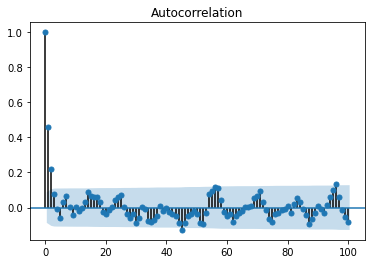

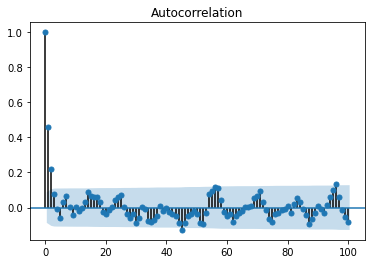

In [ ]:
plot_acf(simulated_data3, lags= 100)

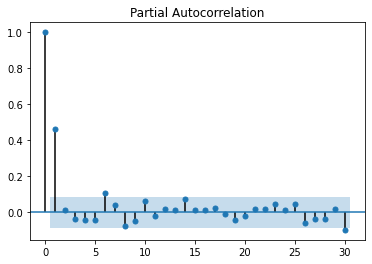

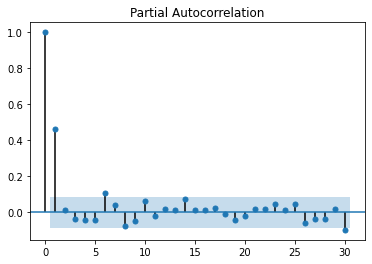

In [ ]:

plot_pacf(simulated_data3, lags = 30)

On changing magnitude of phi **acf and pacf** changes its magnitude whereas on changing the sign of phi **acf and pacf** inverts

**Exercise 2**

There are 4 CSV files in the github repo sent to you. Plot the ACF and PACF value of each of those and report if any is an AR process. If so, of what order? What would the order of each process be, if it were an AR Process? 

In [ ]:
import pandas as pd


SIM1

In [ ]:
df_sim=pd.read_csv("https://raw.githubusercontent.com/gaurav15raj/Time_Series-Econs-/main/AR%20Processes/Sim1.csv")
df_sim.set_index('Unnamed: 0', inplace=True)
df_sim

,0
Unnamed: 0,
0,2.378234
1,-0.495258
2,0.726553
3,1.062996
4,0.979513
...,...
995,-0.002420
996,-0.735925
997,1.159022


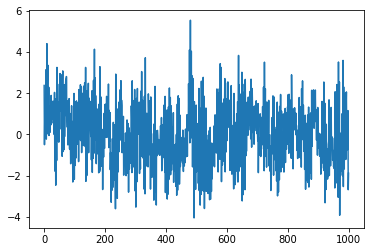

In [ ]:

plt.plot(df_sim)


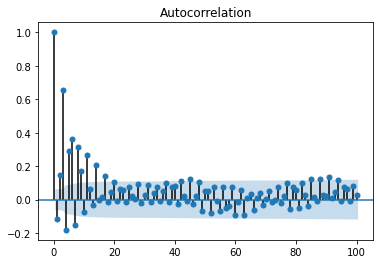

In [ ]:
acf_plot = plot_acf(df_sim, lags=100)

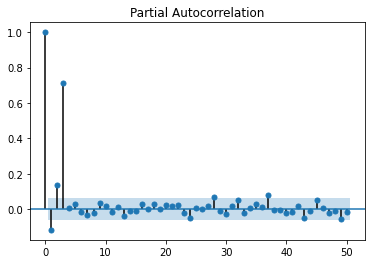

In [ ]:
pacf_plot = plot_pacf(df_sim,lags = 50)

Yes , it is an AR process of order 3

Electric Production

In [ ]:
df_ele=pd.read_csv("https://raw.githubusercontent.com/gaurav15raj/Time_Series-Econs-/main/AR%20Processes/Electric_Production.csv")
df_ele

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [ ]:
df_ele.rename(columns={'DATE':'date', 'IPG2211A2N':'production'}, inplace=True)
df_ele['date'] = pd.to_datetime(df_ele.date)
df_ele.set_index('date', inplace=True)
df_ele

,production
date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


Text(0, 0.5, 'Production')

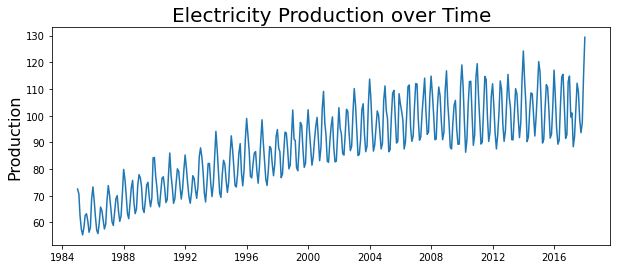

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df_ele)
plt.title('Electricity Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)

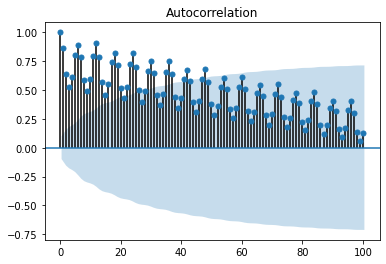

In [ ]:
acf_plot = plot_acf(df_ele, lags=100)

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


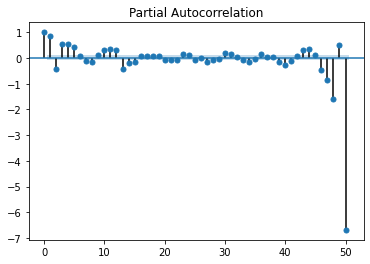

In [ ]:
pacf_plot = plot_pacf(df_ele,lags = 50)

No , it is not an AR process

daily-minimum-temperatures-in-me.csv

In [ ]:
df_dmt=pd.read_csv("https://raw.githubusercontent.com/gaurav15raj/Time_Series-Econs-/main/AR%20Processes/daily-minimum-temperatures-in-me.csv")
df_dmt['Date'] = pd.to_datetime(df_dmt.Date)
df_dmt.rename(columns={'Daily minimum temperatures':'Min_Temp'}, inplace=True
df_dmt=df_dmt.drop([df_dmt.index[565],df_dmt.index[566],df_dmt.index[1290]])
df_dmt.set_index('Date', inplace=True)
df_dmt['Min_Temp']=df_dmt['Min_Temp'].astype(float)
df_dmt

,Min_Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


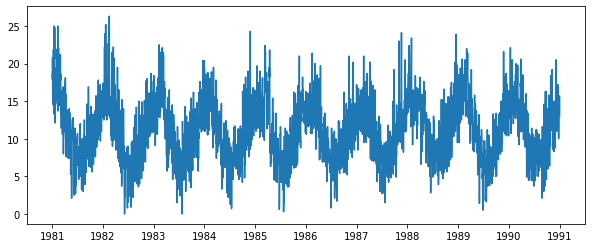

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df_dmt)

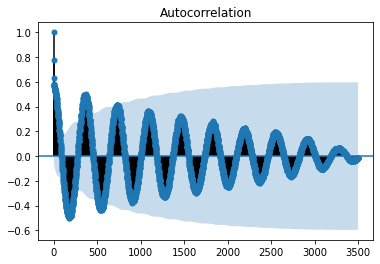

In [ ]:

acf_plot = plot_acf(df_dmt,lags=3500)

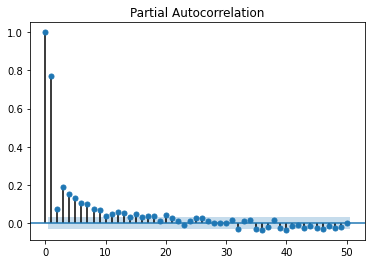

In [ ]:
pacf_plot = plot_pacf(df_dmt,lags=50)

Yes , it is an AR process

sales-of-shampoo-over-a-three-ye.csv

In [ ]:
df_sales=pd.read_csv("https://raw.githubusercontent.com/gaurav15raj/Time_Series-Econs-/main/AR%20Processes/sales-of-shampoo-over-a-three-ye.csv")
df_sales['Month'] = pd.to_datetime(df_sales.Month.apply(lambda val: '202'+val))
df_sales['Month'] = pd.to_datetime(df_sales.Month)
df_sales.set_index('Month', inplace=True)
df_sales.head()

,Sales of shampoo over a three year period
Month,
2021-01-01,266.0
2021-02-01,145.9
2021-03-01,183.1
2021-04-01,119.3
2021-05-01,180.3


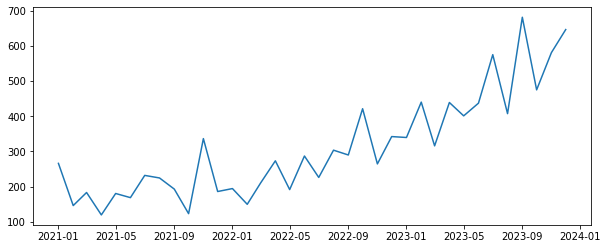

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df_sales)

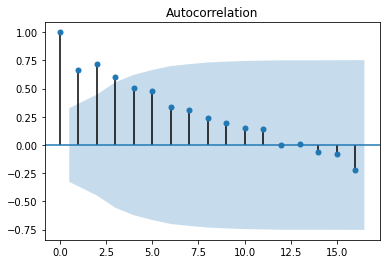

In [ ]:
acf_plot = plot_acf(df_sales)

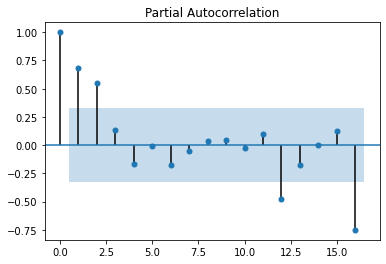

In [ ]:
pacf_plot = plot_pacf(df_sales)

No,it is not a AR process
